In [93]:


import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/heart.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import plotnine as pn
# input cost of living data

In [94]:

df = pd.read_csv('/content/heart.csv')

In [95]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [96]:

df.mean().round()

age          54.0
sex           1.0
cp            1.0
trestbps    132.0
chol        246.0
fbs           0.0
restecg       1.0
thalach     150.0
exang         0.0
oldpeak       1.0
slope         1.0
ca            1.0
thal          2.0
target        1.0
dtype: float64

In [97]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [99]:
df.shape

(303, 14)

In [100]:
%matplotlib inline
import numpy as np
import pandas as pd
import plotnine as pn
import matplotlib.pyplot as plt
import graphviz
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn import metrics

In [101]:
x= df.iloc[:,:-1].values
print(x)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [102]:
y= df.iloc[:,3].values
print (y)

[145 130 130 120 120 140 140 120 172 150 140 130 130 110 150 120 120 150
 150 140 135 130 140 150 140 160 150 110 140 130 105 120 130 125 125 142
 135 150 155 160 140 130 104 130 140 120 140 138 128 138 130 120 130 108
 135 134 122 115 118 128 110 108 118 135 140 138 100 130 120 124 120  94
 130 140 122 135 125 140 128 105 112 128 102 152 102 115 118 101 110 100
 124 132 138 132 112 142 140 108 130 130 148 178 140 120 129 120 160 138
 120 110 180 150 140 110 130 120 130 120 105 138 130 138 112 108  94 118
 112 152 136 120 160 134 120 110 126 130 120 128 110 128 120 115 120 106
 140 156 118 150 120 130 160 112 170 146 138 130 130 122 125 130 120 132
 120 138 138 160 120 140 130 140 130 110 120 132 130 110 117 140 120 150
 132 150 130 112 150 112 130 124 140 110 130 128 120 145 140 170 150 125
 120 110 110 125 150 180 160 128 110 150 120 140 128 120 118 145 125 132
 130 130 135 130 150 140 138 200 110 145 120 120 170 125 108 165 160 120
 130 140 125 140 125 126 160 174 145 152 132 124 13

In [103]:
#Handling Missing data:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True)



In [104]:

imputerimputer= imputer.fit(x[:, 1:3])
x[:, 1:3]= imputer.transform(x[:, 1:3])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.


In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [106]:
#Feature Scaling of datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
sc= OneHotEncoder(handle_unknown='ignore')
st_x= StandardScaler()
#sc = StandardScaler(with_mean=False)
x_train_sc = sc.fit(x_train)
x_train =x_train_sc.transform(x_train)
x_test = x_train_sc.transform(x_test)

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

knn_train_acc = accuracy_score(y_train, knn.predict(x_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.5763546798029556
Test Accuracy of KNN Model is 0.26


In [108]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [109]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          94       0.00      0.00      0.00         1
         100       0.00      0.00      0.00         1
         101       0.00      0.00      0.00         0
         102       0.00      0.00      0.00         2
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         3
         106       0.00      0.00      0.00         1
         108       0.00      0.00      0.00         1
         110       0.10      0.50      0.17         4
         112       0.00      0.00      0.00         0
         115       0.00      0.00      0.00         1
         117       0.00      0.00      0.00         1
         118       0.00      0.00      0.00         2
         120       0.33      1.00      0.50         8
         122       0.00      0.00      0.00         2
         123       0.00      0.00      0.00         0
         124       0.00      0.00      0.00         1
         125       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control thi

In [110]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.83


In [111]:
confusion_matrix(y_test, y_pred)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [112]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          94       0.00      0.00      0.00         1
         100       1.00      1.00      1.00         1
         102       0.00      0.00      0.00         2
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         3
         106       0.00      0.00      0.00         1
         108       1.00      1.00      1.00         1
         110       1.00      1.00      1.00         4
         114       0.00      0.00      0.00         0
         115       1.00      1.00      1.00         1
         117       0.00      0.00      0.00         1
         118       1.00      1.00      1.00         2
         120       1.00      1.00      1.00         8
         122       1.00      1.00      1.00         2
         123       0.00      0.00      0.00         0
         124       1.00      1.00      1.00         1
         125       1.00      1.00      1.00         6
         126       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control thi

In [113]:
#Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 3, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 180)
rand_clf.fit(x_train, y_train)

y_pred = rand_clf.predict(x_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(x_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.6551724137931034
Test Accuracy of Random Forest Model is 0.48


In [115]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [116]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          94       0.00      0.00      0.00         1
         100       0.00      0.00      0.00         1
         102       0.00      0.00      0.00         2
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         3
         106       0.00      0.00      0.00         1
         108       0.00      0.00      0.00         1
         110       1.00      1.00      1.00         4
         115       0.00      0.00      0.00         1
         117       0.00      0.00      0.00         1
         118       0.00      0.00      0.00         2
         120       0.21      1.00      0.34         8
         122       0.00      0.00      0.00         2
         124       0.00      0.00      0.00         1
         125       0.00      0.00      0.00         6
         126       0.00      0.00      0.00         1
         128       0.00      0.00      0.00         5
         129       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [117]:
#logistic regresion

In [118]:
# fitting data to model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

lr_train_acc = accuracy_score(y_train, lr.predict(x_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 1.0
Test Accuracy of Logistic Regression Model is 0.66


In [119]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [120]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          94       0.00      0.00      0.00         1
         100       0.00      0.00      0.00         1
         102       0.00      0.00      0.00         2
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         3
         106       0.00      0.00      0.00         1
         108       0.00      0.00      0.00         1
         110       0.36      1.00      0.53         4
         112       0.00      0.00      0.00         0
         115       0.00      0.00      0.00         1
         117       0.00      0.00      0.00         1
         118       0.67      1.00      0.80         2
         120       0.57      1.00      0.73         8
         122       0.00      0.00      0.00         2
         124       0.00      0.00      0.00         1
         125       0.60      0.50      0.55         6
         126       0.00      0.00      0.00         1
         128       0.71    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control thi

In [121]:
models = [ 'KNN',  'Decision Tree', 'Random Forest','Logistic Regression']
scores = [ knn_test_acc, dtc_test_acc, rand_clf_test_acc, lr_test_acc ]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = True)

,Model,Score
0,KNN,0.26
2,Random Forest,0.48
3,Logistic Regression,0.66
1,Decision Tree,0.83


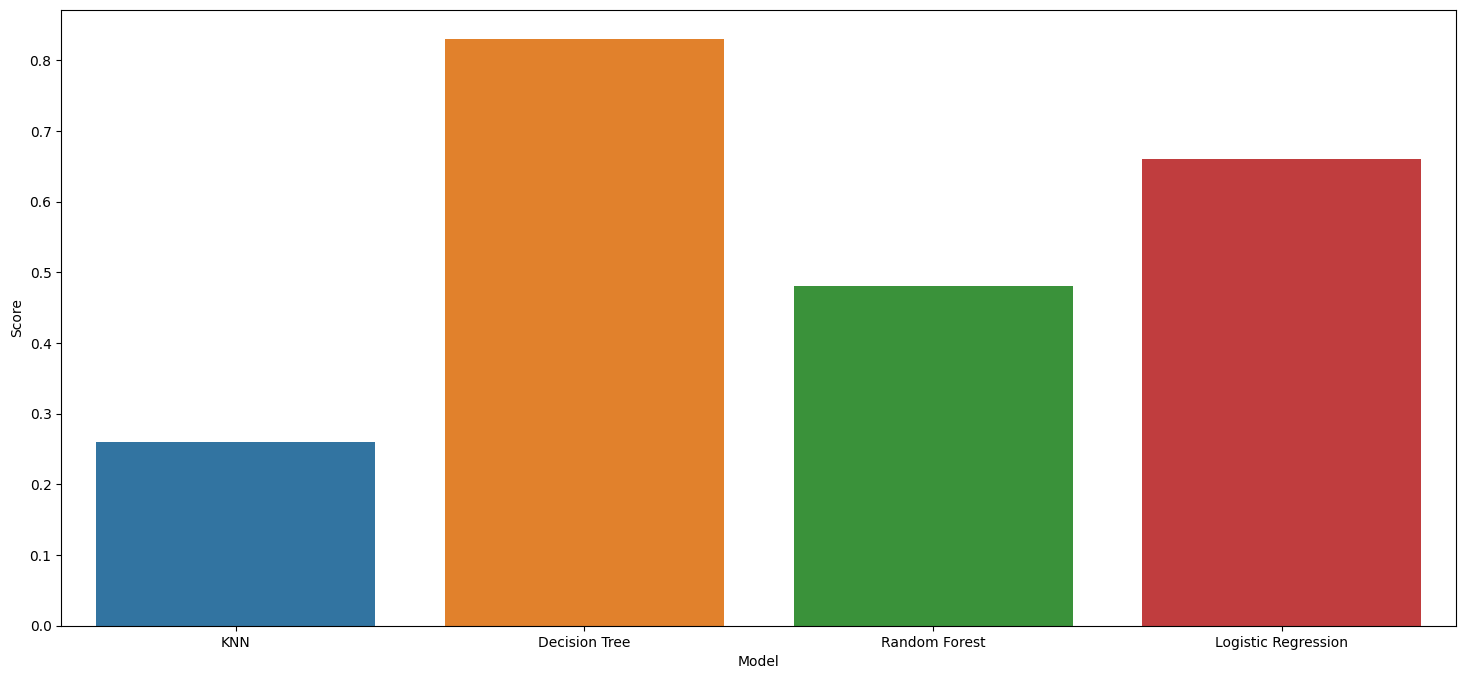

In [122]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()